<a href="https://colab.research.google.com/github/oscarfdezmora/CourseraPython/blob/master/TFG_Definitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Definición de nuestro entorno de trabajo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos las librerías

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.7.0


Reestructuramos en tres conjuntos:



*   .**completos**, que contiene las imágenes de movimiento completo
*   .**parcial**, que contiene las imágenes de movimiento parcial
*   .**completos_parcial**, que contiene ambos conjuntos de imágenes

A su vez, cada directorio tiene los sets de datos divididos en dos carpetas


*   .**/choque**, donde estarán los solapes
*   .**/no_choque**, donde se verán dos cuadrados



In [ ]:
## Definimos nuestra ruta de trabajo
main = '/content/drive/MyDrive/Óscar_Redes/Data/'
completos = main+'completos'
completos_parcial = main+'completos+parcial'
parcial = main+'parcial'
full = main+'full'

simples = '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosSimples/'

Inicializamos los parámetros con los que procesaremos las imágenes. 


*   ***img_height*** e ***img_size*** son el tamaño de las imágenes
*   ***batch_size*** es el tamaño con el que se crean los tensores; por defecto es 32



In [ ]:
## Inicialización de parámetros de procesado
batch_size = 32  ## Tamaño por defecto
img_height = 50
img_width = 50

A partir de nuestro set de imágenes, se crean dos partes: 


*   entrenamiento, con el que entrenamos el modelo.
*   validación, contra el que evaluamos.

La proporción es 80/20 respecto a todo el data set.


In [ ]:
## Generación de set de entrenamiento
train_ds = tf.keras.utils.image_dataset_from_directory(     
  completos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 1920 files belonging to 2 classes.
Using 1536 files for training.


In [ ]:
## Generación de set de validación
val_ds = tf.keras.utils.image_dataset_from_directory(
  completos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False)

Found 1920 files belonging to 2 classes.
Using 384 files for validation.


Generamos otro set de entrenamiento con los dos tipos de imágenes (completas y parciales)

In [ ]:
'''## Generación de set de entrenamiento
train_ds_par = tf.keras.utils.image_dataset_from_directory(     
  completos_parcial,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

## Generación de set de validación
val_ds_par = tf.keras.utils.image_dataset_from_directory(
  completos_parcial,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False)

train_ds_full = tf.keras.utils.image_dataset_from_directory(     
  full,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

val_ds_full = tf.keras.utils.image_dataset_from_directory(
  full,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False)
'''

'## Generación de set de entrenamiento\ntrain_ds_par = tf.keras.utils.image_dataset_from_directory(     \n  completos_parcial,\n  validation_split=0.2,\n  subset="training",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size,\n  shuffle=True)\n\n## Generación de set de validación\nval_ds_par = tf.keras.utils.image_dataset_from_directory(\n  completos_parcial,\n  validation_split=0.2,\n  subset="validation",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size,\n  shuffle=False)\n\ntrain_ds_full = tf.keras.utils.image_dataset_from_directory(     \n  full,\n  validation_split=0.2,\n  subset="training",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size,\n  shuffle=True)\n\nval_ds_full = tf.keras.utils.image_dataset_from_directory(\n  full,\n  validation_split=0.2,\n  subset="validation",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size,\n  shuffle=False)\n'

In [ ]:
## Generación de set de entrenamiento
train_ds_par = tf.keras.utils.image_dataset_from_directory(     
  completos_parcial,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

## Generación de set de validación
val_ds_par = tf.keras.utils.image_dataset_from_directory(
  completos_parcial,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False)

Found 2240 files belonging to 2 classes.
Using 1792 files for training.
Found 2240 files belonging to 2 classes.
Using 448 files for validation.


In [ ]:
paralelos = main + 'paralelos'

## Generación de set de entrenamiento
train_paralelos = tf.keras.utils.image_dataset_from_directory(     
  paralelos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

## Generación de set de validación
val_paralelos = tf.keras.utils.image_dataset_from_directory(
  paralelos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False)

Found 1920 files belonging to 2 classes.
Using 1536 files for training.
Found 1920 files belonging to 2 classes.
Using 384 files for validation.


In [ ]:
completos_paralelos = main + 'completos+paralelos'

## Generación de set de entrenamiento
train_completos_paralelos = tf.keras.utils.image_dataset_from_directory(     
  completos_paralelos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

## Generación de set de validación
val_completos_paralelos = tf.keras.utils.image_dataset_from_directory(
  completos_paralelos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False)

Found 2880 files belonging to 2 classes.
Using 2304 files for training.
Found 2880 files belonging to 2 classes.
Using 576 files for validation.


In [ ]:
simplestrain = simples + 'EstimulosSimplesCompletos'

## Generación de set de entrenamiento
train_simples = tf.keras.utils.image_dataset_from_directory(     
  simplestrain,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

## Generación de set de validación
val_simples = tf.keras.utils.image_dataset_from_directory(
  simplestrain,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False)

Found 1920 files belonging to 2 classes.
Using 1536 files for training.
Found 1920 files belonging to 2 classes.
Using 384 files for validation.


Creamos también un set de validación de choques parciales

In [ ]:
## Comprobación de que se han reconocido bien las clases

class_names = val_ds.class_names
print("clases de validación: " + str(class_names))

class_names = train_ds.class_names
print("clases de entrenamiento: " + str(class_names))


clases de validación: ['choque', 'no_choque']
clases de entrenamiento: ['choque', 'no_choque']


Comprobamos que las imágenes se leen correctamente. 

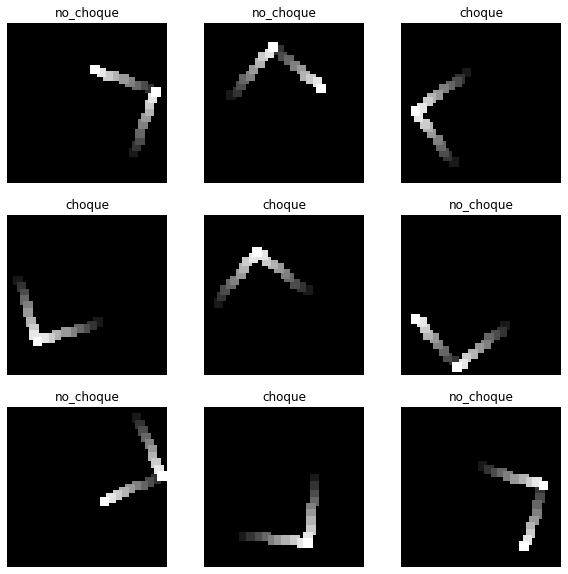

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
## Revisamos la estructura de las imágenes
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 50, 50, 3)
(32,)


In [ ]:
## Optimización de memoria

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_ds_par = train_ds_par.cache().prefetch(buffer_size=AUTOTUNE)
val_ds_par = val_ds_par.cache().prefetch(buffer_size=AUTOTUNE)

train_paralelos = train_paralelos.cache().prefetch(buffer_size=AUTOTUNE)
val_paralelos = val_paralelos.cache().prefetch(buffer_size=AUTOTUNE)

train_completos_paralelos = train_completos_paralelos.cache().prefetch(buffer_size=AUTOTUNE)
val_completos_paralelos = val_completos_paralelos.cache().prefetch(buffer_size=AUTOTUNE)

train_simples = train_simples.cache().prefetch(buffer_size=AUTOTUNE)
val_simples = val_simples.cache().prefetch(buffer_size=AUTOTUNE)


Definición de nuestra red, que tendrá las siguientes partes:


*   Preprocesado aleatorio de la imagen, rotando de manera aleatoria horizontal y verticalmente. Con esto conseguiremos mayor variedad de las muestras.

*   Primera capa donde reescalamos la imagen a valores entre 0 y 1. Éste después le pasamos por una capa ReLu de 32 neuronas y resaltamos las características (maxpooling)

*   Segunda capa similar a la anterior, con dropout del 30% (el 30 de las neuronas deja de funcionar aleatoriamente)

*   Tercera capa similar a la anterior, con dropout del 30% (el 30 de las neuronas deja de funcionar aleatoriamente)

*   Cuarta capa donde vectorizamos el resultado, y se lo pasamos a una capa de 128 neuronas

*   Capa final clasificadora





Compilamos el modelo

Entrenamos el modelo. 
Esto funcionará por *epochs*, donde la parte de entrenamiento y validación se randomizan, pasando sets aleatorios de datos cada vez. 
En cada epoch se reevaluan los datos, evaluándose el loss (disparidad de resultados respecto al esperado) y la precisión. 

Para evitar el sobreentrenamiento (que se aprenda demasiado los datos de entrenamiento) se añade una función de early stopping

Evolución de las gráficas de loss y accuracy de entrenamiento y validación

In [ ]:
## Generación de set de validación

choque = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Data/completos/choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

nochoque = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Data/completos/no_choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_choque = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Data/parcial/choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_nochoque = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Data/parcial/no_choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_cuadradoInicio = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosDegradados/EstimulosUnCuadradoConInicio',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_cuadrado = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosDegradados/EstimulosUnCuadrado',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_doscuadradoInicio = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosDegradados/EstimulosDosCuadradosConInicio',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_doscuadrado = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosDegradados/EstimulosDosCuadrados',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_doscuadradoInicio_paralelo = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosDegradados/EstimulosDosCuadradosConInicio_par',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

nochoque_paralelo = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosDegradados/EstimulosFusionadosconDegradado_par',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_nochoque_paralelo = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosDegradados/EstimulosParcialesDegradados_par',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 960 files belonging to 1 classes.
Found 960 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 960 files belonging to 1 classes.
Found 160 files belonging to 1 classes.


In [ ]:
def testeo_pruebas(modelo,datos):
  predictions = modelo.predict(datos)
  muestras = len(predictions)

  num_choques = 0
  for i in predictions:
    num_choques = num_choques + np.argmax(i)

  choques = muestras - num_choques
  no_choques = num_choques
  
  print("    Muestras: " + str(muestras))
  print("    Choques: " +str(choques))
  print("    No Choques: " +str(num_choques))

  return muestras, choques, no_choques


  

In [ ]:
def test_model(name, modelo, train, test):
  modelo.compile(
    optimizer='adam',         ## el optimizador del gradiente estocástico
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])
  
  early_stopping = EarlyStopping(
    min_delta=0.001, # valor mínimo de cambio para que se considere una mejora
    patience=5, # cuantas épocas antes de que se pare
    restore_best_weights=True,
    )

  history = modelo.fit(
    train,
    validation_data=test,
    epochs=100,
    callbacks=[early_stopping], # definición para el earlystopping
    )
  
  history_frame = pd.DataFrame(history.history)
  #history_frame.loc[:, ['loss', 'val_loss']].plot()
  #history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

  # summarize history for accuracy
  plt.plot(history_frame['accuracy'])
  plt.plot(history_frame['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history_frame['loss'])
  plt.plot(history_frame['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  epochs = len(history_frame['loss'])
  print("Epochs", epochs)

  score = modelo.evaluate(test)
  print("Test loss", score[0])
  print("Test accuracy", score[1])
  
  vector = [name, epochs, score[0], score[1]]
  
  print("======================================")

  print("Validación choques completos")
  vector.extend(testeo_pruebas(modelo, choque))

  print("Validación no choques completos")
  vector.extend(testeo_pruebas(modelo, nochoque))

  print("Validación choques parciales")
  
  vector.extend(testeo_pruebas(modelo, parcial_choque))

  print("Validación no choques parcial")
  vector.extend(testeo_pruebas(modelo, parcial_nochoque))

  print("Validación de solo cuadrado con inicio")
  
  vector.extend(testeo_pruebas(modelo, parcial_cuadradoInicio))

  print("Validación de solo cuadrado")
  
  vector.extend(testeo_pruebas(modelo, parcial_cuadrado))

  print("Validación de dos cuadrados con inicio")
  
  vector.extend(testeo_pruebas(modelo, parcial_doscuadradoInicio))

  print("Validación de dos cuadrado")
 
  vector.extend(testeo_pruebas(modelo, parcial_doscuadrado))

  vector.extend(testeo_pruebas(modelo, parcial_doscuadradoInicio_paralelo))

  vector.extend(testeo_pruebas(modelo, nochoque_paralelo))

  vector.extend(testeo_pruebas(modelo, parcial_nochoque_paralelo))

  resultados.append(vector)

In [ ]:
## Modelo 1 - Completo
model1 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Tercera capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 2 - Dos capas de filtrado
model2 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 3 - Una capa de filtrado
model3 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 4 - Completo, doble capa densa
model4 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Tercera capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 5 - Dos capas de filtrado
model5 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 6 - Una capa de filtrado
model6 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 7 - Una capa de filtrado, unica capa 64 neuronas
model7 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Tercera capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 8 - Dos capas de filtrado, unica capa 64 neuronas
model8 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 9 - Una capa de filtrado, unica capa 64 neuronas
model9 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 10 - Una capa de filtrado, unica capa 32 neuronas
model10 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Tercera capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 11 - Dos capas de filtrado, unica capa 32 neuronas
model11 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 12 - Una capa de filtrado, unica capa 32 neuronas
model12 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 13 - Tres capas de filtrado, dos capas 64 neuronas
model13 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Tercera capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 14 - Dos capas de filtrado, dos capas 64 neuronas
model14 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 15 - Una capa de filtrado, dos capas 64 neuronas
model15 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 16 - Tres capas de filtrado, dos capas 32 neuronas
model16 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Tercera capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 17 - Dos capas de filtrado, dos capa 32 neuronas
model17 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Segunda capa de filtrado y condensado
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

## Modelo 18 - Una capa de filtrado, dos capa 32 neuronas
model18 = tf.keras.Sequential([
  ## Randomiza las imágenes
  tf.keras.layers.RandomFlip('horizontal'),                           
  tf.keras.layers.RandomFlip(mode='vertical'),

  ## Normaliza, y primera capa de filtrado y condensado 
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  ## Head, con el core del clasificador de la red
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

modelos = [model1, model2, model3, model4, model5, model6, 
           model7, model8, model9, model10, model11, model12, 
           model13, model14, model15, model16, model17, model18]

modelos_name_ent1 = ["model1", "model2", "model3", "model4", "model5", "model6", 
                "model7", "model8", "model9", "model10", "model11", "model12", 
                "model13", "model14", "model15", "model16", "model17", "model18"]

modelos_name_ent2 = ["model1_par", "model2_par", "model3_par", "model4_par", "model5_par", "model6_par", 
                "model7_par", "model8_par", "model9_par", "model10_par", "model11_par", "model12_par", 
                "model13_par", "model14_par", "model15_par", "model16_par", "model17_par", "model18_par"]

modelos_name_ent3 = ["model1_paralelo", "model2_paralelo", "model3_paralelo", "model4_paralelo", "model5_paralelo", "model6_paralelo", 
                "model7_paralelo", "model8_paralelo", "model9_paralelo", "model10_paralelo", "model11_paralelo", "model12_paralelo", 
                "model13_paralelo", "model14_paralelo", "model15_paralelo", "model16_paralelo", "model17_paralelo", "model18_paralelo"]

modelos_name_ent4 = ["model1_full+paralelo", "model2_full+paralelo", "model3_full+paralelo", "model4_full+paralelo", "model5_full+paralelo", "model6_full+paralelo", 
                "model7_full+paralelo", "model8_full+paralelo", "model9_full+paralelo", "model10_full+paralelo", "model11_full+paralelo", "model12_full+paralelo", 
                "model13_full+paralelo", "model14_full+paralelo", "model15_full+paralelo", "model16_full+paralelo", "model17_full+paralelo", "model18_full+paralelo"]











  
        ===== Inicio modelo model1_paralelo =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 6s 102ms/step - loss: 0.0435 - accuracy: 0.9870 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 2/100
48/48 [==============================] - 5s 99ms/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.0183 - val_accuracy: 0.9974
Epoch 3/100
48/48 [==============================] - 5s 98ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 4/100
48/48 [==============================] - 5s 98ms/step - loss: 0.0425 - accuracy: 0.9805 - val_loss: 0.2156 - val_accuracy: 0.9219
Epoch 5/100
48/48 [==============================] - 5s 98ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0371 - val_accuracy: 0.9948
Epoch 6/100
48/48 [==============================] - 5s 99ms/step - loss: 0.0130 - accuracy: 0.9928 - val_loss: 0.0165 - val_accuracy: 0.9974
Epoch 7/100
48/48 [==============================] - 5s

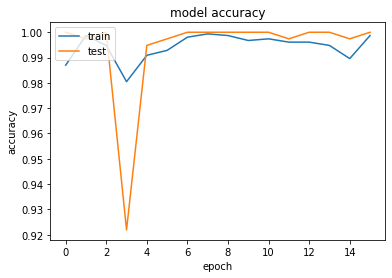

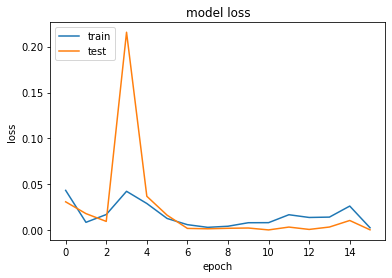

Epochs 16
12/12 [==============================] - 0s 25ms/step - loss: 5.2597e-04 - accuracy: 1.0000
Test loss 0.000525969488080591
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 388
    No Choques: 572
Validación choques parciales
    Muestras: 160
    Choques: 39
    No Choques: 121
Validación no choques parcial
    Muestras: 160
    Choques: 33
    No Choques: 127
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 9
    No Choques: 151
Validación de solo cuadrado
    Muestras: 160
    Choques: 30
    No Choques: 130
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 8
    No Choques: 152
Validación de dos cuadrado
    Muestras: 160
    Choques: 21
    No Choques: 139
    Muestras: 160
    Choques: 2
    No Choques: 158
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 14
    No Choques: 146

  
  

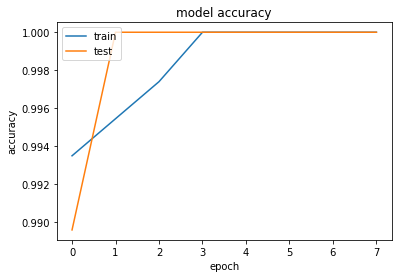

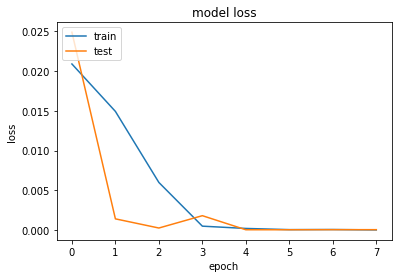

Epochs 8
12/12 [==============================] - 0s 24ms/step - loss: 2.6422e-04 - accuracy: 1.0000
Test loss 0.00026421569054946303
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 403
    No Choques: 557
Validación choques parciales
    Muestras: 160
    Choques: 97
    No Choques: 63
Validación no choques parcial
    Muestras: 160
    Choques: 112
    No Choques: 48
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 98
    No Choques: 62
Validación de solo cuadrado
    Muestras: 160
    Choques: 156
    No Choques: 4
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 44
    No Choques: 116
Validación de dos cuadrado
    Muestras: 160
    Choques: 121
    No Choques: 39
    Muestras: 160
    Choques: 1
    No Choques: 159
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 126
    No Choques: 34

  
  

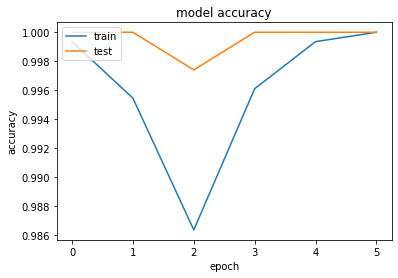

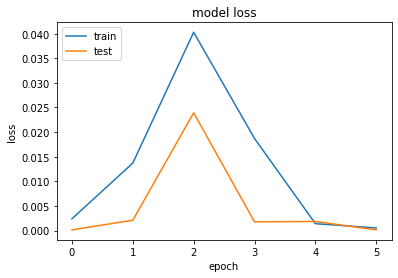

Epochs 6
12/12 [==============================] - 0s 19ms/step - loss: 1.3016e-04 - accuracy: 1.0000
Test loss 0.00013015810691285878
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 959
    No Choques: 1
Validación no choques completos
    Muestras: 960
    Choques: 420
    No Choques: 540
Validación choques parciales
    Muestras: 160
    Choques: 94
    No Choques: 66
Validación no choques parcial
    Muestras: 160
    Choques: 106
    No Choques: 54
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 88
    No Choques: 72
Validación de solo cuadrado
    Muestras: 160
    Choques: 154
    No Choques: 6
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 69
    No Choques: 91
Validación de dos cuadrado
    Muestras: 160
    Choques: 125
    No Choques: 35
    Muestras: 160
    Choques: 4
    No Choques: 156
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 109
    No Choques: 51

  
   

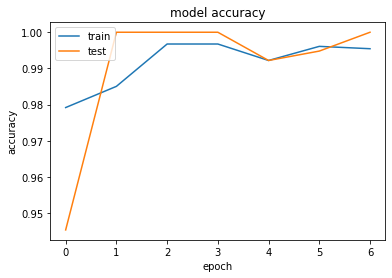

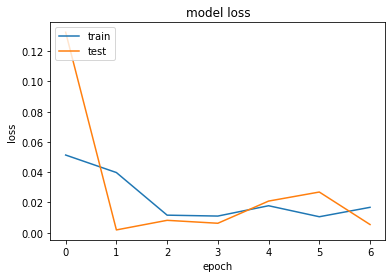

Epochs 7
12/12 [==============================] - 0s 24ms/step - loss: 0.0019 - accuracy: 1.0000
Test loss 0.001863825717009604
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 380
    No Choques: 580
Validación choques parciales
    Muestras: 160
    Choques: 34
    No Choques: 126
Validación no choques parcial
    Muestras: 160
    Choques: 19
    No Choques: 141
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 14
    No Choques: 146
Validación de solo cuadrado
    Muestras: 160
    Choques: 45
    No Choques: 115
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 13
    No Choques: 147
Validación de dos cuadrado
    Muestras: 160
    Choques: 39
    No Choques: 121
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 10
    No Choques: 150

  
     

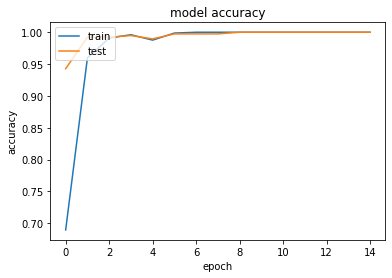

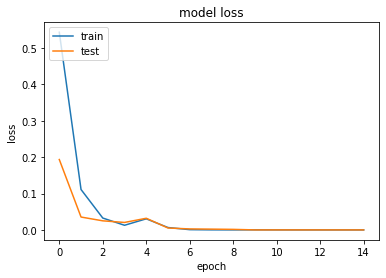

Epochs 15
12/12 [==============================] - 0s 27ms/step - loss: 2.6372e-05 - accuracy: 1.0000
Test loss 2.6371621061116457e-05
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 178
    No Choques: 782
Validación choques parciales
    Muestras: 160
    Choques: 51
    No Choques: 109
Validación no choques parcial
    Muestras: 160
    Choques: 103
    No Choques: 57
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 135
    No Choques: 25
Validación de solo cuadrado
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 19
    No Choques: 141
Validación de dos cuadrado
    Muestras: 160
    Choques: 90
    No Choques: 70
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 124
    No Choques: 36

  


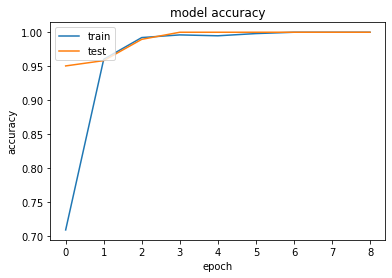

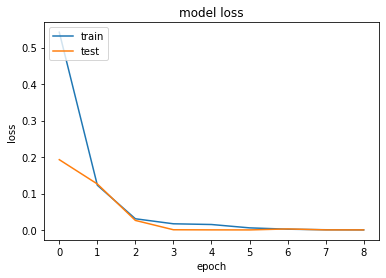

Epochs 9
12/12 [==============================] - 0s 22ms/step - loss: 6.7464e-04 - accuracy: 1.0000
Test loss 0.0006746377912349999
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 948
    No Choques: 12
Validación no choques completos
    Muestras: 960
    Choques: 397
    No Choques: 563
Validación choques parciales
    Muestras: 160
    Choques: 94
    No Choques: 66
Validación no choques parcial
    Muestras: 160
    Choques: 113
    No Choques: 47
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 88
    No Choques: 72
Validación de solo cuadrado
    Muestras: 160
    Choques: 158
    No Choques: 2
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 73
    No Choques: 87
Validación de dos cuadrado
    Muestras: 160
    Choques: 136
    No Choques: 24
    Muestras: 160
    Choques: 22
    No Choques: 138
    Muestras: 960
    Choques: 2
    No Choques: 958
    Muestras: 160
    Choques: 84
    No Choques: 76

  
   

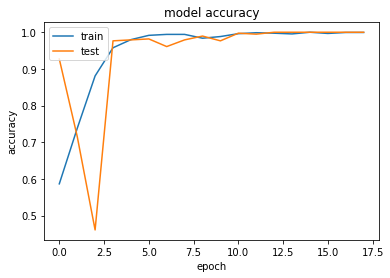

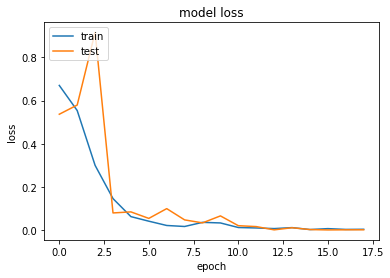

Epochs 18
12/12 [==============================] - 0s 29ms/step - loss: 8.6574e-04 - accuracy: 1.0000
Test loss 0.0008657418075017631
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 825
    No Choques: 135
Validación choques parciales
    Muestras: 160
    Choques: 71
    No Choques: 89
Validación no choques parcial
    Muestras: 160
    Choques: 55
    No Choques: 105
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 15
    No Choques: 145
Validación de solo cuadrado
    Muestras: 160
    Choques: 57
    No Choques: 103
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 15
    No Choques: 145
Validación de dos cuadrado
    Muestras: 160
    Choques: 51
    No Choques: 109
    Muestras: 160
    Choques: 2
    No Choques: 158
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 12
    No Choques: 148

  


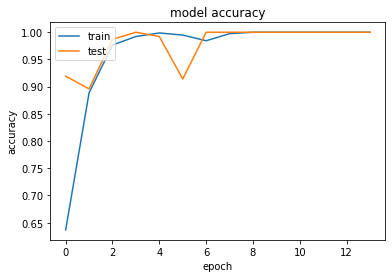

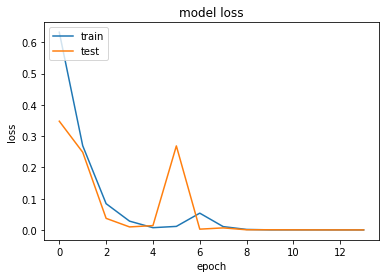

Epochs 14
12/12 [==============================] - 0s 25ms/step - loss: 5.0444e-04 - accuracy: 1.0000
Test loss 0.0005044405697844923
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 340
    No Choques: 620
Validación choques parciales
    Muestras: 160
    Choques: 75
    No Choques: 85
Validación no choques parcial
    Muestras: 160
    Choques: 132
    No Choques: 28
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 96
    No Choques: 64
Validación de solo cuadrado
    Muestras: 160
    Choques: 156
    No Choques: 4
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 30
    No Choques: 130
Validación de dos cuadrado
    Muestras: 160
    Choques: 101
    No Choques: 59
    Muestras: 160
    Choques: 1
    No Choques: 159
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 134
    No Choques: 26

  
  

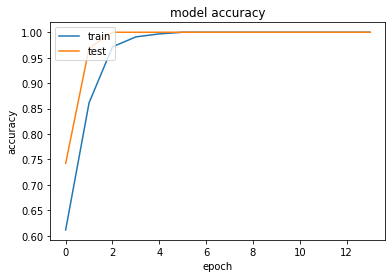

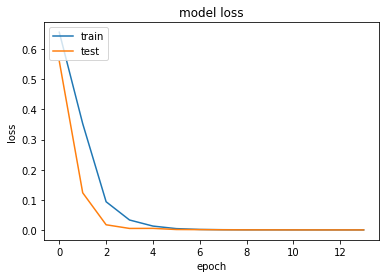

Epochs 14
12/12 [==============================] - 0s 20ms/step - loss: 3.5960e-04 - accuracy: 1.0000
Test loss 0.0003596039314288646
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 557
    No Choques: 403
Validación choques parciales
    Muestras: 160
    Choques: 115
    No Choques: 45
Validación no choques parcial
    Muestras: 160
    Choques: 126
    No Choques: 34
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 92
    No Choques: 68
Validación de solo cuadrado
    Muestras: 160
    Choques: 156
    No Choques: 4
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 76
    No Choques: 84
Validación de dos cuadrado
    Muestras: 160
    Choques: 132
    No Choques: 28
    Muestras: 160
    Choques: 9
    No Choques: 151
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 107
    No Choques: 53

  
  

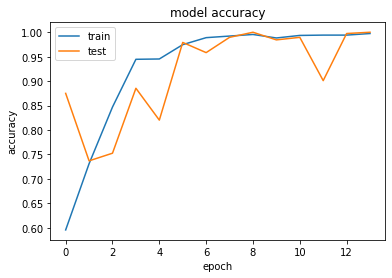

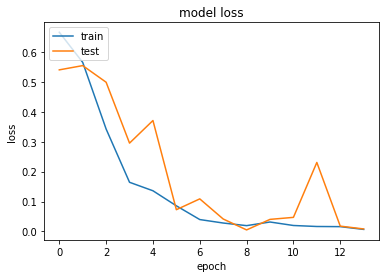

Epochs 14
12/12 [==============================] - 0s 29ms/step - loss: 0.0052 - accuracy: 1.0000
Test loss 0.005156668834388256
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 685
    No Choques: 275
Validación choques parciales
    Muestras: 160
    Choques: 68
    No Choques: 92
Validación no choques parcial
    Muestras: 160
    Choques: 66
    No Choques: 94
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 13
    No Choques: 147
Validación de solo cuadrado
    Muestras: 160
    Choques: 73
    No Choques: 87
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 13
    No Choques: 147
Validación de dos cuadrado
    Muestras: 160
    Choques: 46
    No Choques: 114
    Muestras: 160
    Choques: 1
    No Choques: 159
    Muestras: 960
    Choques: 1
    No Choques: 959
    Muestras: 160
    Choques: 8
    No Choques: 152

  
        

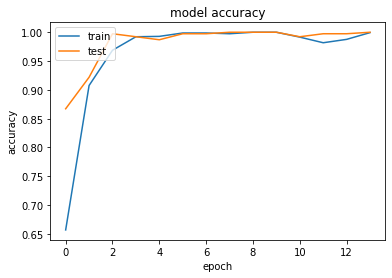

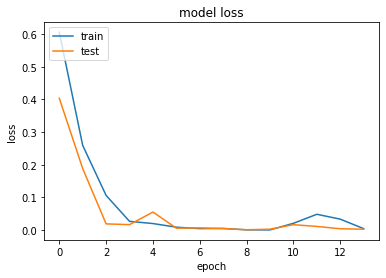

Epochs 14
12/12 [==============================] - 0s 25ms/step - loss: 7.1699e-04 - accuracy: 1.0000
Test loss 0.0007169865421019495
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 354
    No Choques: 606
Validación choques parciales
    Muestras: 160
    Choques: 88
    No Choques: 72
Validación no choques parcial
    Muestras: 160
    Choques: 130
    No Choques: 30
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 93
    No Choques: 67
Validación de solo cuadrado
    Muestras: 160
    Choques: 154
    No Choques: 6
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 30
    No Choques: 130
Validación de dos cuadrado
    Muestras: 160
    Choques: 107
    No Choques: 53
    Muestras: 160
    Choques: 1
    No Choques: 159
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 127
    No Choques: 33

  
  

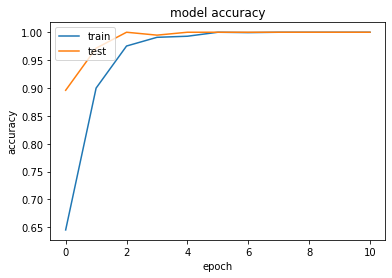

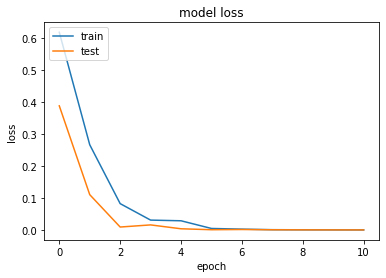

Epochs 11
12/12 [==============================] - 0s 18ms/step - loss: 0.0010 - accuracy: 1.0000
Test loss 0.0010238437680527568
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 498
    No Choques: 462
Validación choques parciales
    Muestras: 160
    Choques: 95
    No Choques: 65
Validación no choques parcial
    Muestras: 160
    Choques: 119
    No Choques: 41
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 79
    No Choques: 81
Validación de solo cuadrado
    Muestras: 160
    Choques: 156
    No Choques: 4
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 76
    No Choques: 84
Validación de dos cuadrado
    Muestras: 160
    Choques: 127
    No Choques: 33
    Muestras: 160
    Choques: 18
    No Choques: 142
    Muestras: 960
    Choques: 1
    No Choques: 959
    Muestras: 160
    Choques: 103
    No Choques: 57

  
      

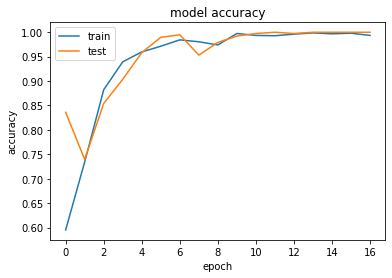

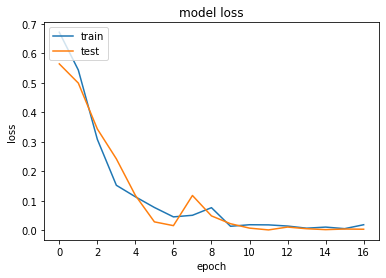

Epochs 17
12/12 [==============================] - 0s 29ms/step - loss: 9.9897e-04 - accuracy: 1.0000
Test loss 0.0009989748941734433
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 959
    No Choques: 1
Validación no choques completos
    Muestras: 960
    Choques: 251
    No Choques: 709
Validación choques parciales
    Muestras: 160
    Choques: 39
    No Choques: 121
Validación no choques parcial
    Muestras: 160
    Choques: 31
    No Choques: 129
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 36
    No Choques: 124
Validación de solo cuadrado
    Muestras: 160
    Choques: 81
    No Choques: 79
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 15
    No Choques: 145
Validación de dos cuadrado
    Muestras: 160
    Choques: 42
    No Choques: 118
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 1
    No Choques: 959
    Muestras: 160
    Choques: 20
    No Choques: 140

  


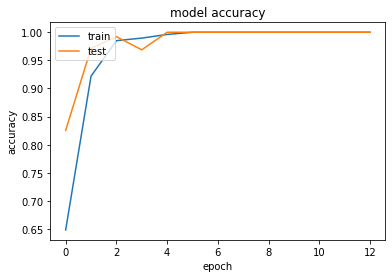

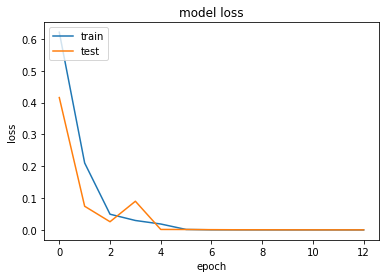

Epochs 13
12/12 [==============================] - 0s 27ms/step - loss: 5.1364e-04 - accuracy: 1.0000
Test loss 0.0005136446561664343
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 269
    No Choques: 691
Validación choques parciales
    Muestras: 160
    Choques: 88
    No Choques: 72
Validación no choques parcial
    Muestras: 160
    Choques: 129
    No Choques: 31
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 138
    No Choques: 22
Validación de solo cuadrado
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 38
    No Choques: 122
Validación de dos cuadrado
    Muestras: 160
    Choques: 121
    No Choques: 39
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 134
    No Choques: 26

  
 

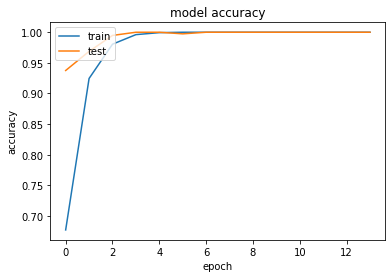

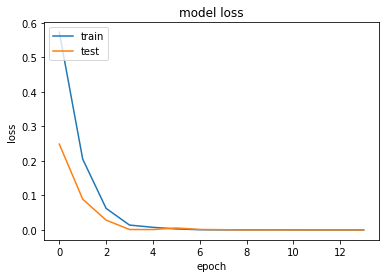

Epochs 14
12/12 [==============================] - 0s 20ms/step - loss: 9.1357e-05 - accuracy: 1.0000
Test loss 9.1357076598797e-05
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 449
    No Choques: 511
Validación choques parciales
    Muestras: 160
    Choques: 105
    No Choques: 55
Validación no choques parcial
    Muestras: 160
    Choques: 102
    No Choques: 58
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 85
    No Choques: 75
Validación de solo cuadrado
    Muestras: 160
    Choques: 156
    No Choques: 4
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 68
    No Choques: 92
Validación de dos cuadrado
    Muestras: 160
    Choques: 137
    No Choques: 23
    Muestras: 160
    Choques: 11
    No Choques: 149
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 104
    No Choques: 56

  
   

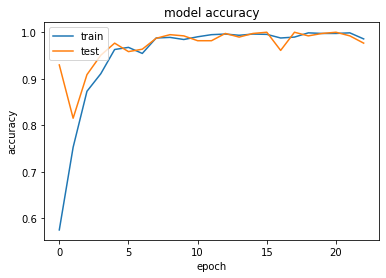

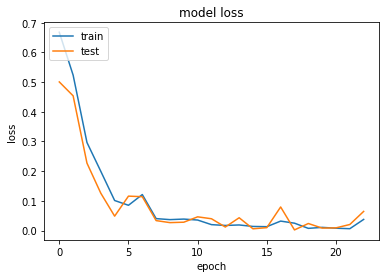

Epochs 23
12/12 [==============================] - 0s 28ms/step - loss: 0.0022 - accuracy: 1.0000
Test loss 0.0021674237214028835
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 959
    No Choques: 1
Validación no choques completos
    Muestras: 960
    Choques: 500
    No Choques: 460
Validación choques parciales
    Muestras: 160
    Choques: 44
    No Choques: 116
Validación no choques parcial
    Muestras: 160
    Choques: 33
    No Choques: 127
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 12
    No Choques: 148
Validación de solo cuadrado
    Muestras: 160
    Choques: 69
    No Choques: 91
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 10
    No Choques: 150
Validación de dos cuadrado
    Muestras: 160
    Choques: 36
    No Choques: 124
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 10
    No Choques: 150

  
    

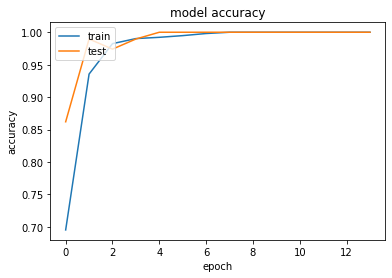

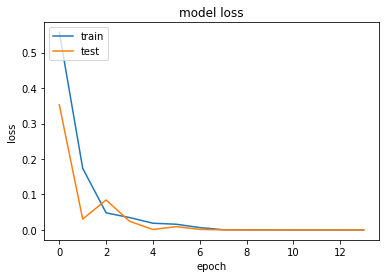

Epochs 14
12/12 [==============================] - 0s 28ms/step - loss: 1.3720e-04 - accuracy: 1.0000
Test loss 0.000137198599986732
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 244
    No Choques: 716
Validación choques parciales
    Muestras: 160
    Choques: 71
    No Choques: 89
Validación no choques parcial
    Muestras: 160
    Choques: 114
    No Choques: 46
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 130
    No Choques: 30
Validación de solo cuadrado
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 36
    No Choques: 124
Validación de dos cuadrado
    Muestras: 160
    Choques: 99
    No Choques: 61
    Muestras: 160
    Choques: 2
    No Choques: 158
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 123
    No Choques: 37

  
   

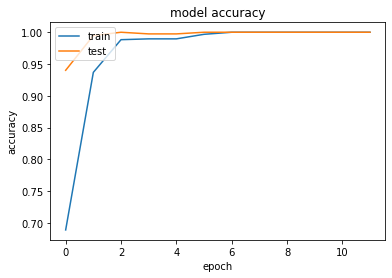

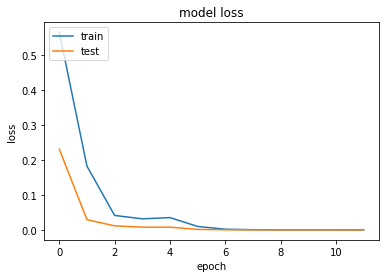

Epochs 12
12/12 [==============================] - 0s 21ms/step - loss: 4.9787e-04 - accuracy: 1.0000
Test loss 0.0004978661891072989
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 462
    No Choques: 498
Validación choques parciales
    Muestras: 160
    Choques: 106
    No Choques: 54
Validación no choques parcial
    Muestras: 160
    Choques: 120
    No Choques: 40
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 115
    No Choques: 45
Validación de solo cuadrado
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 97
    No Choques: 63
Validación de dos cuadrado
    Muestras: 160
    Choques: 145
    No Choques: 15
    Muestras: 160
    Choques: 31
    No Choques: 129
    Muestras: 960
    Choques: 1
    No Choques: 959
    Muestras: 160
    Choques: 113
    No Choques: 47

  


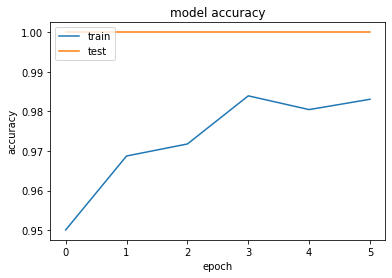

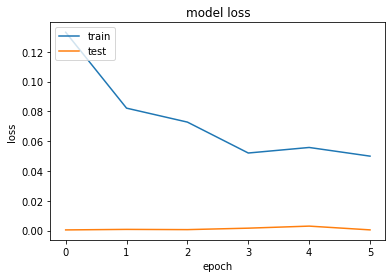

Epochs 6
18/18 [==============================] - 1s 30ms/step - loss: 4.1470e-04 - accuracy: 1.0000
Test loss 0.00041469847201369703
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 106
    No Choques: 854
Validación choques parciales
    Muestras: 160
    Choques: 25
    No Choques: 135
Validación no choques parcial
    Muestras: 160
    Choques: 16
    No Choques: 144
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 10
    No Choques: 150
Validación de solo cuadrado
    Muestras: 160
    Choques: 26
    No Choques: 134
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 5
    No Choques: 155
Validación de dos cuadrado
    Muestras: 160
    Choques: 17
    No Choques: 143
    Muestras: 160
    Choques: 2
    No Choques: 158
    Muestras: 960
    Choques: 1
    No Choques: 959
    Muestras: 160
    Choques: 10
    No Choques: 150

  


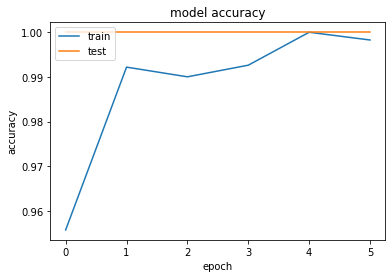

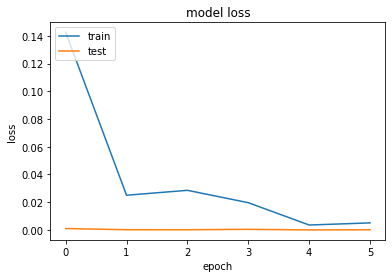

Epochs 6
18/18 [==============================] - 1s 28ms/step - loss: 0.0010 - accuracy: 1.0000
Test loss 0.0010156779317185283
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 953
    No Choques: 7
Validación no choques completos
    Muestras: 960
    Choques: 33
    No Choques: 927
Validación choques parciales
    Muestras: 160
    Choques: 27
    No Choques: 133
Validación no choques parcial
    Muestras: 160
    Choques: 43
    No Choques: 117
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 77
    No Choques: 83
Validación de solo cuadrado
    Muestras: 160
    Choques: 151
    No Choques: 9
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 2
    No Choques: 158
Validación de dos cuadrado
    Muestras: 160
    Choques: 56
    No Choques: 104
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 79
    No Choques: 81

  
        =

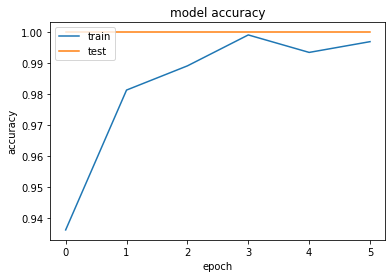

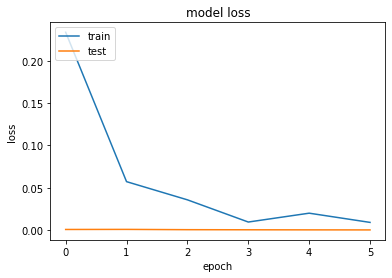

Epochs 6
18/18 [==============================] - 0s 21ms/step - loss: 6.2598e-04 - accuracy: 1.0000
Test loss 0.0006259761867113411
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 923
    No Choques: 37
Validación no choques completos
    Muestras: 960
    Choques: 44
    No Choques: 916
Validación choques parciales
    Muestras: 160
    Choques: 29
    No Choques: 131
Validación no choques parcial
    Muestras: 160
    Choques: 49
    No Choques: 111
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 35
    No Choques: 125
Validación de solo cuadrado
    Muestras: 160
    Choques: 150
    No Choques: 10
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 10
    No Choques: 150
Validación de dos cuadrado
    Muestras: 160
    Choques: 87
    No Choques: 73
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 79
    No Choques: 81

  
  

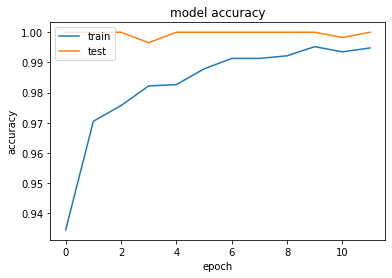

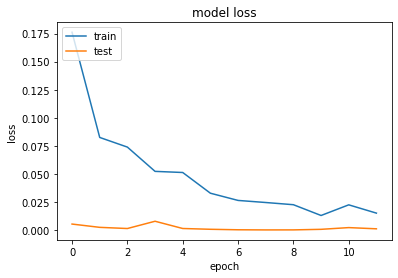

Epochs 12
18/18 [==============================] - 1s 28ms/step - loss: 1.9692e-04 - accuracy: 1.0000
Test loss 0.00019692277419380844
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 12
    No Choques: 948
Validación choques parciales
    Muestras: 160
    Choques: 2
    No Choques: 158
Validación no choques parcial
    Muestras: 160
    Choques: 2
    No Choques: 158
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 15
    No Choques: 145
Validación de solo cuadrado
    Muestras: 160
    Choques: 21
    No Choques: 139
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 9
    No Choques: 151
Validación de dos cuadrado
    Muestras: 160
    Choques: 1
    No Choques: 159
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 3
    No Choques: 157

  
    

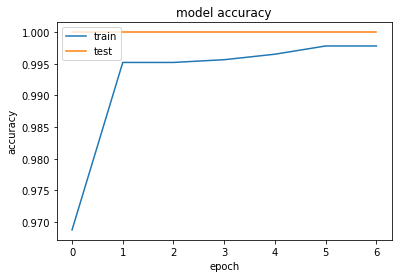

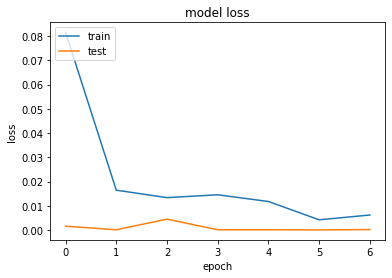

Epochs 7
18/18 [==============================] - 1s 30ms/step - loss: 7.7299e-05 - accuracy: 1.0000
Test loss 7.729942444711924e-05
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 953
    No Choques: 7
Validación no choques completos
    Muestras: 960
    Choques: 8
    No Choques: 952
Validación choques parciales
    Muestras: 160
    Choques: 26
    No Choques: 134
Validación no choques parcial
    Muestras: 160
    Choques: 60
    No Choques: 100
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 139
    No Choques: 21
Validación de solo cuadrado
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 9
    No Choques: 151
Validación de dos cuadrado
    Muestras: 160
    Choques: 34
    No Choques: 126
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 111
    No Choques: 49

  
    

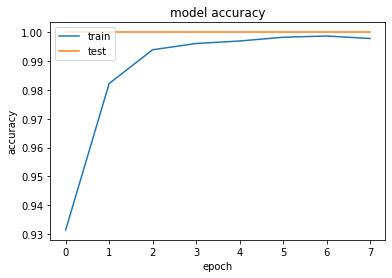

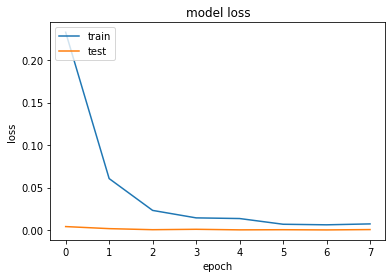

Epochs 8
18/18 [==============================] - 0s 23ms/step - loss: 3.7886e-04 - accuracy: 1.0000
Test loss 0.0003788649628404528
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 947
    No Choques: 13
Validación no choques completos
    Muestras: 960
    Choques: 11
    No Choques: 949
Validación choques parciales
    Muestras: 160
    Choques: 23
    No Choques: 137
Validación no choques parcial
    Muestras: 160
    Choques: 45
    No Choques: 115
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 63
    No Choques: 97
Validación de solo cuadrado
    Muestras: 160
    Choques: 152
    No Choques: 8
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 8
    No Choques: 152
Validación de dos cuadrado
    Muestras: 160
    Choques: 62
    No Choques: 98
    Muestras: 160
    Choques: 2
    No Choques: 158
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 97
    No Choques: 63

  
     

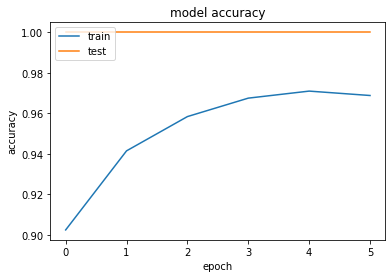

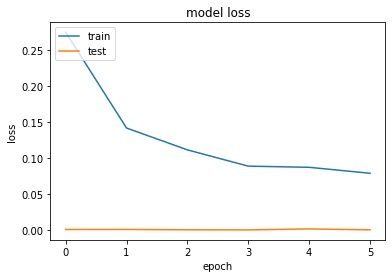

Epochs 6
18/18 [==============================] - 1s 31ms/step - loss: 9.5089e-04 - accuracy: 1.0000
Test loss 0.0009508864604867995
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 954
    No Choques: 6
Validación no choques completos
    Muestras: 960
    Choques: 114
    No Choques: 846
Validación choques parciales
    Muestras: 160
    Choques: 19
    No Choques: 141
Validación no choques parcial
    Muestras: 160
    Choques: 13
    No Choques: 147
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 5
    No Choques: 155
Validación de solo cuadrado
    Muestras: 160
    Choques: 26
    No Choques: 134
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 4
    No Choques: 156
Validación de dos cuadrado
    Muestras: 160
    Choques: 18
    No Choques: 142
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 1
    No Choques: 159

  
   

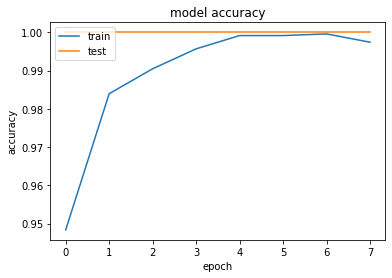

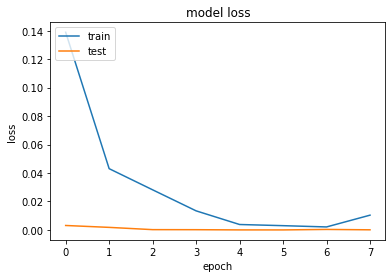

Epochs 8
18/18 [==============================] - 1s 29ms/step - loss: 2.0320e-04 - accuracy: 1.0000
Test loss 0.00020319709437899292
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 953
    No Choques: 7
Validación no choques completos
    Muestras: 960
    Choques: 4
    No Choques: 956
Validación choques parciales
    Muestras: 160
    Choques: 15
    No Choques: 145
Validación no choques parcial
    Muestras: 160
    Choques: 71
    No Choques: 89
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 116
    No Choques: 44
Validación de solo cuadrado
    Muestras: 160
    Choques: 147
    No Choques: 13
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 3
    No Choques: 157
Validación de dos cuadrado
    Muestras: 160
    Choques: 38
    No Choques: 122
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 116
    No Choques: 44

  
   

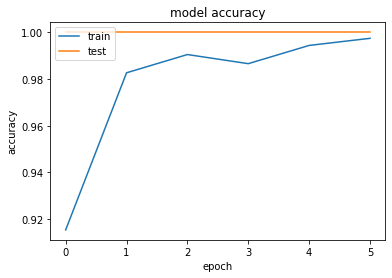

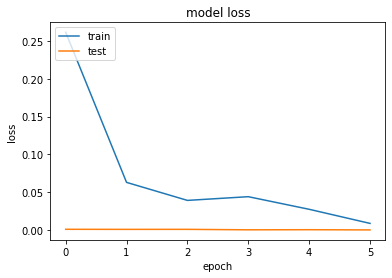

Epochs 6
18/18 [==============================] - 0s 21ms/step - loss: 0.0010 - accuracy: 1.0000
Test loss 0.0010055628372356296
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 917
    No Choques: 43
Validación no choques completos
    Muestras: 960
    Choques: 45
    No Choques: 915
Validación choques parciales
    Muestras: 160
    Choques: 36
    No Choques: 124
Validación no choques parcial
    Muestras: 160
    Choques: 51
    No Choques: 109
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 29
    No Choques: 131
Validación de solo cuadrado
    Muestras: 160
    Choques: 150
    No Choques: 10
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 15
    No Choques: 145
Validación de dos cuadrado
    Muestras: 160
    Choques: 79
    No Choques: 81
    Muestras: 160
    Choques: 2
    No Choques: 158
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 50
    No Choques: 110

  
     

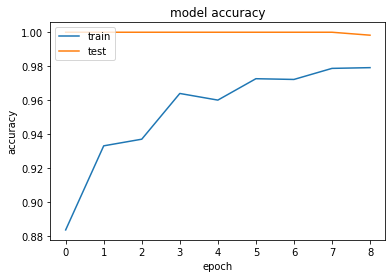

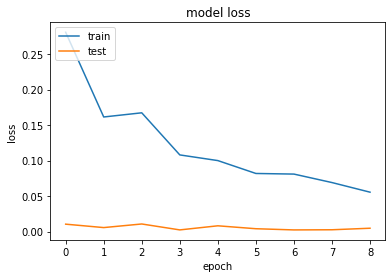

Epochs 9
18/18 [==============================] - 1s 33ms/step - loss: 0.0024 - accuracy: 1.0000
Test loss 0.0023780805058777332
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 953
    No Choques: 7
Validación no choques completos
    Muestras: 960
    Choques: 37
    No Choques: 923
Validación choques parciales
    Muestras: 160
    Choques: 14
    No Choques: 146
Validación no choques parcial
    Muestras: 160
    Choques: 7
    No Choques: 153
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 6
    No Choques: 154
Validación de solo cuadrado
    Muestras: 160
    Choques: 28
    No Choques: 132
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 4
    No Choques: 156
Validación de dos cuadrado
    Muestras: 160
    Choques: 12
    No Choques: 148
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 1
    No Choques: 959
    Muestras: 160
    Choques: 4
    No Choques: 156

  
        =

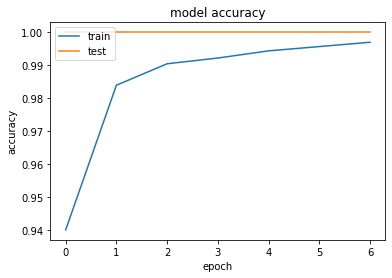

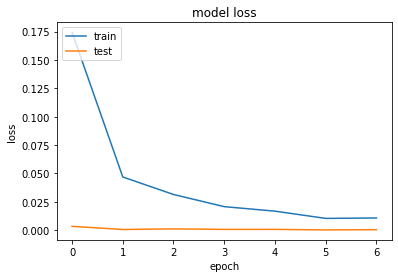

Epochs 7
18/18 [==============================] - 1s 30ms/step - loss: 4.8387e-04 - accuracy: 1.0000
Test loss 0.00048387196147814393
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 954
    No Choques: 6
Validación no choques completos
    Muestras: 960
    Choques: 16
    No Choques: 944
Validación choques parciales
    Muestras: 160
    Choques: 19
    No Choques: 141
Validación no choques parcial
    Muestras: 160
    Choques: 71
    No Choques: 89
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 106
    No Choques: 54
Validación de solo cuadrado
    Muestras: 160
    Choques: 152
    No Choques: 8
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 3
    No Choques: 157
Validación de dos cuadrado
    Muestras: 160
    Choques: 44
    No Choques: 116
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 112
    No Choques: 48

  
   

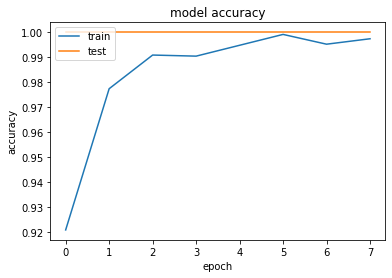

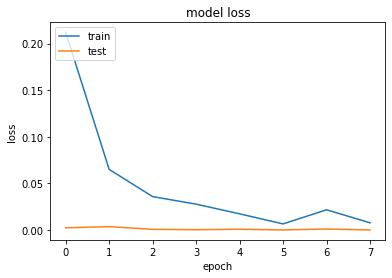

Epochs 8
18/18 [==============================] - 0s 20ms/step - loss: 7.9231e-04 - accuracy: 1.0000
Test loss 0.0007923138327896595
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 932
    No Choques: 28
Validación no choques completos
    Muestras: 960
    Choques: 10
    No Choques: 950
Validación choques parciales
    Muestras: 160
    Choques: 26
    No Choques: 134
Validación no choques parcial
    Muestras: 160
    Choques: 81
    No Choques: 79
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 40
    No Choques: 120
Validación de solo cuadrado
    Muestras: 160
    Choques: 147
    No Choques: 13
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 16
    No Choques: 144
Validación de dos cuadrado
    Muestras: 160
    Choques: 75
    No Choques: 85
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 94
    No Choques: 66

  
   

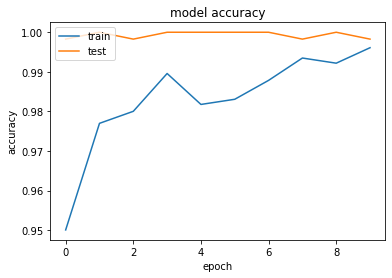

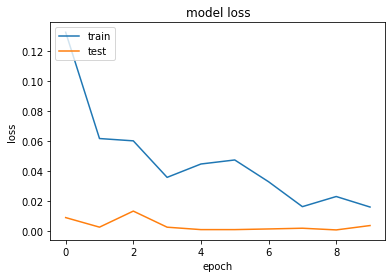

Epochs 10
18/18 [==============================] - 1s 31ms/step - loss: 8.2598e-04 - accuracy: 1.0000
Test loss 0.0008259848691523075
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 959
    No Choques: 1
Validación no choques completos
    Muestras: 960
    Choques: 16
    No Choques: 944
Validación choques parciales
    Muestras: 160
    Choques: 6
    No Choques: 154
Validación no choques parcial
    Muestras: 160
    Choques: 3
    No Choques: 157
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 42
    No Choques: 118
Validación de solo cuadrado
    Muestras: 160
    Choques: 30
    No Choques: 130
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 9
    No Choques: 151
Validación de dos cuadrado
    Muestras: 160
    Choques: 12
    No Choques: 148
    Muestras: 160
    Choques: 1
    No Choques: 159
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 9
    No Choques: 151

  
    

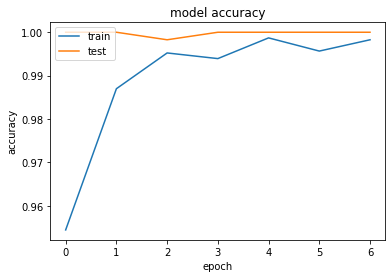

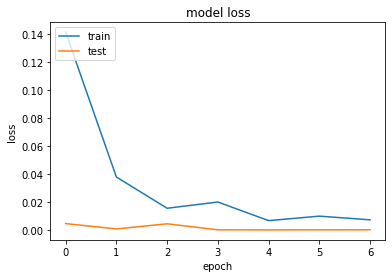

Epochs 7
18/18 [==============================] - 1s 30ms/step - loss: 7.2875e-04 - accuracy: 1.0000
Test loss 0.0007287493208423257
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 957
    No Choques: 3
Validación no choques completos
    Muestras: 960
    Choques: 11
    No Choques: 949
Validación choques parciales
    Muestras: 160
    Choques: 45
    No Choques: 115
Validación no choques parcial
    Muestras: 160
    Choques: 108
    No Choques: 52
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 136
    No Choques: 24
Validación de solo cuadrado
    Muestras: 160
    Choques: 158
    No Choques: 2
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 6
    No Choques: 154
Validación de dos cuadrado
    Muestras: 160
    Choques: 51
    No Choques: 109
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 133
    No Choques: 27

  
   

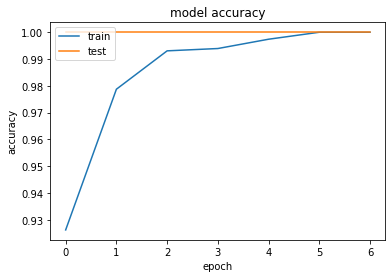

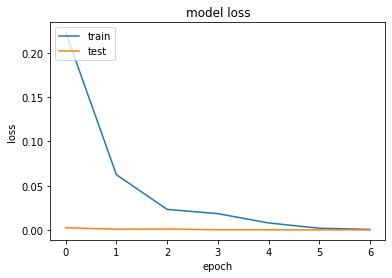

Epochs 7
18/18 [==============================] - 0s 22ms/step - loss: 8.2767e-04 - accuracy: 1.0000
Test loss 0.0008276721928268671
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 950
    No Choques: 10
Validación no choques completos
    Muestras: 960
    Choques: 5
    No Choques: 955
Validación choques parciales
    Muestras: 160
    Choques: 22
    No Choques: 138
Validación no choques parcial
    Muestras: 160
    Choques: 38
    No Choques: 122
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 46
    No Choques: 114
Validación de solo cuadrado
    Muestras: 160
    Choques: 149
    No Choques: 11
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 4
    No Choques: 156
Validación de dos cuadrado
    Muestras: 160
    Choques: 66
    No Choques: 94
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 74
    No Choques: 86

  
    

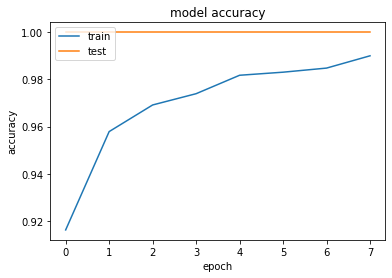

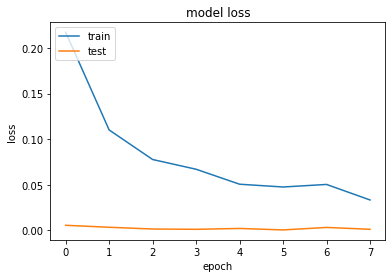

Epochs 8
18/18 [==============================] - 1s 33ms/step - loss: 0.0013 - accuracy: 1.0000
Test loss 0.0013224412687122822
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 955
    No Choques: 5
Validación no choques completos
    Muestras: 960
    Choques: 47
    No Choques: 913
Validación choques parciales
    Muestras: 160
    Choques: 5
    No Choques: 155
Validación no choques parcial
    Muestras: 160
    Choques: 2
    No Choques: 158
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 6
    No Choques: 154
Validación de solo cuadrado
    Muestras: 160
    Choques: 32
    No Choques: 128
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 7
    No Choques: 153
Validación de dos cuadrado
    Muestras: 160
    Choques: 12
    No Choques: 148
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 4
    No Choques: 156

  
        ==

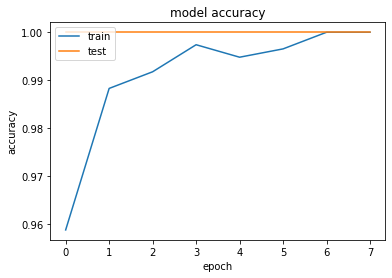

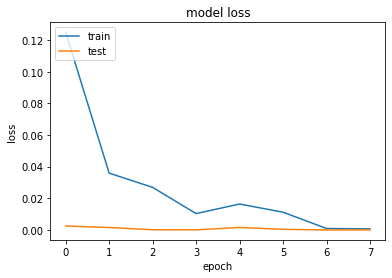

Epochs 8
18/18 [==============================] - 1s 31ms/step - loss: 1.1992e-04 - accuracy: 1.0000
Test loss 0.00011991750943707302
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 940
    No Choques: 20
Validación no choques completos
    Muestras: 960
    Choques: 2
    No Choques: 958
Validación choques parciales
    Muestras: 160
    Choques: 14
    No Choques: 146
Validación no choques parcial
    Muestras: 160
    Choques: 45
    No Choques: 115
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 131
    No Choques: 29
Validación de solo cuadrado
    Muestras: 160
    Choques: 156
    No Choques: 4
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 1
    No Choques: 159
Validación de dos cuadrado
    Muestras: 160
    Choques: 31
    No Choques: 129
    Muestras: 160
    Choques: 0
    No Choques: 160
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 120
    No Choques: 40

  
  

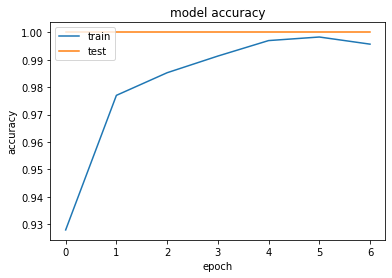

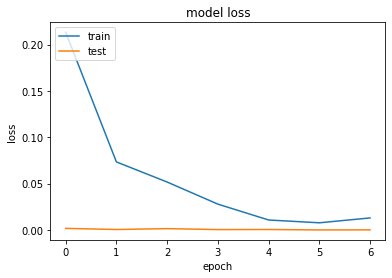

Epochs 7
18/18 [==============================] - 0s 23ms/step - loss: 4.9840e-04 - accuracy: 1.0000
Test loss 0.0004983959370292723
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 931
    No Choques: 29
Validación no choques completos
    Muestras: 960
    Choques: 13
    No Choques: 947
Validación choques parciales
    Muestras: 160
    Choques: 25
    No Choques: 135
Validación no choques parcial
    Muestras: 160
    Choques: 54
    No Choques: 106
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 62
    No Choques: 98
Validación de solo cuadrado
    Muestras: 160
    Choques: 154
    No Choques: 6
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 18
    No Choques: 142
Validación de dos cuadrado
    Muestras: 160
    Choques: 82
    No Choques: 78
    Muestras: 160
    Choques: 5
    No Choques: 155
    Muestras: 960
    Choques: 0
    No Choques: 960
    Muestras: 160
    Choques: 88
    No Choques: 72


In [ ]:
resultados = []

for modelo in modelos_name_ent3:
  
  print('''
  
        ===================================
        ===== Inicio modelo''', modelo, '''=====
        ===================================''')
  
  print('''
        ============================
        == Entrenamiento completo ==
        ============================''')
  
  test_model(modelo,modelos[modelos_name_ent3.index(modelo)], train_paralelos, val_paralelos)

for modelo in modelos_name_ent4:
  print('''
  
        ===================================
        ===== Inicio modelo''', modelo, '''=====
        ===================================''')
  
  print('''
        ======================================
        == Entrenamiento completo + parcial ==
        ======================================''')
  
  test_model(modelo,modelos[modelos_name_ent4.index(modelo)], train_completos_paralelos, val_completos_paralelos)



In [ ]:
## Crear dataframe con los resultados

columnas = ['Modelo','Epochs','Loss','Accuracy',
            'Choque completo - Muestra','Choque completo - true','Choque completo - false', 
            'NoChoque completo - Muestra','NoChoque completo - true','NoChoque completo - false',
            'Choque parcial - Muestra','Choque parcial - true','Choque parcial - false', 
            'NoChoque parcial - Muestra','NoChoque parcial - true','NoChoque parcial - false',
            'Choque cuadrado - Muestra','Choque cuadrado - true','Choque cuadrado - false', 
            'NoChoque cuadrado - Muestra','NoChoque cuadrado - true','NoChoque cuadrado - false',
            'Choque cuadrado parcial - Muestra','Choque cuadrado parcial - true','Choque cuadrado parcial - false', 
            'NoChoque cuadrado parcial - Muestra','NoChoque cuadrado parcial - true','NoChoque cuadrado parcial - false',
            'NoChoque cuadrado parcial Paralelo - Muestra','NoChoque cuadrado parcial Paralelo - true','NoChoque cuadrado parcial Paralelo - false',
            'NoChoque completo Paralelo - Muestra','NoChoque completo Paralelo - true','NoChoque completo Paralelo - false',
            'NoChoque parcial Paralelo - Muestra','NoChoque parcial Paralelo - true','NoChoque parcial Paralelo - false']




df = pd.DataFrame(resultados, columns=columnas)

df.to_excel('resultados_TFG.xlsx',
             sheet_name='resultados',
             index = False)  

!cp resultados_TFG.xlsx '/content/drive/MyDrive/Óscar_Redes/'


In [ ]:
df

,Modelo,Epochs,Loss,Accuracy,Choque completo - Muestra,Choque completo - true,Choque completo - false,NoChoque completo - Muestra,NoChoque completo - true,NoChoque completo - false,Choque parcial - Muestra,Choque parcial - true,Choque parcial - false,NoChoque parcial - Muestra,NoChoque parcial - true,NoChoque parcial - false,Choque cuadrado - Muestra,Choque cuadrado - true,Choque cuadrado - false,NoChoque cuadrado - Muestra,NoChoque cuadrado - true,NoChoque cuadrado - false,Choque cuadrado parcial - Muestra,Choque cuadrado parcial - true,Choque cuadrado parcial - false,NoChoque cuadrado parcial - Muestra,NoChoque cuadrado parcial - true,NoChoque cuadrado parcial - false,NoChoque cuadrado parcial Paralelo - Muestra,NoChoque cuadrado parcial Paralelo - true,NoChoque cuadrado parcial Paralelo - false,NoChoque completo Paralelo - Muestra,NoChoque completo Paralelo - true,NoChoque completo Paralelo - false,NoChoque parcial Paralelo - Muestra,NoChoque parcial Paralelo - true,NoChoque parcial Paralelo - false
0,model1_paralelo,16,0.000526,1.0,960,960,0,960,388,572,160,39,121,160,33,127,160,9,151,160,30,130,160,8,152,160,21,139,160,2,158,960,0,960,160,14,146
1,model2_paralelo,8,0.000264,1.0,960,960,0,960,403,557,160,97,63,160,112,48,160,98,62,160,156,4,160,44,116,160,121,39,160,1,159,960,0,960,160,126,34
2,model3_paralelo,6,0.000130,1.0,960,959,1,960,420,540,160,94,66,160,106,54,160,88,72,160,154,6,160,69,91,160,125,35,160,4,156,960,0,960,160,109,51
3,model4_paralelo,7,0.001864,1.0,960,960,0,960,380,580,160,34,126,160,19,141,160,14,146,160,45,115,160,13,147,160,39,121,160,0,160,960,0,960,160,10,150
4,model5_paralelo,15,0.000026,1.0,960,960,0,960,178,782,160,51,109,160,103,57,160,135,25,160,159,1,160,19,141,160,90,70,160,0,160,960,0,960,160,124,36
5,model6_paralelo,9,0.000675,1.0,960,948,12,960,397,563,160,94,66,160,113,47,160,88,72,160,158,2,160,73,87,160,136,24,160,22,138,960,2,958,160,84,76
6,model7_paralelo,18,0.000866,1.0,960,960,0,960,825,135,160,71,89,160,55,105,160,15,145,160,57,103,160,15,145,160,51,109,160,2,158,960,0,960,160,12,148
7,model8_paralelo,14,0.000504,1.0,960,960,0,960,340,620,160,75,85,160,132,28,160,96,64,160,156,4,160,30,130,160,101,59,160,1,159,960,0,960,160,134,26
8,model9_paralelo,14,0.000360,1.0,960,960,0,960,557,403,160,115,45,160,126,34,160,92,68,160,156,4,160,76,84,160,132,28,160,9,151,960,0,960,160,107,53
9,model10_paralelo,14,0.005157,1.0,960,960,0,960,685,275,160,68,92,160,66,94,160,13,147,160,73,87,160,13,147,160,46,114,160,1,159,960,1,959,160,8,152


In [ ]:
choque_simple = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosSimples/EstimulosSimplesCompletos/choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

nochoque_simple = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosSimples/EstimulosSimplesCompletos/no_choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_choque_simple = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosSimples/EstimulosSimplesParciales/choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_nochoque_simple = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosSimples/EstimulosSimplesParciales/no_choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_cuadradoInicio_simple = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosSimples/EstimulosConCuadradosConInicio/choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_cuadrado_simple = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosSimples/EstimulosConCuadrados/choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_doscuadradoInicio_simple = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosSimples/EstimulosConCuadradosConInicio/no_choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

parcial_doscuadrado_simple = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Óscar_Redes/Estimulos/EstimulosSimples/EstimulosConCuadrados/no_choque',
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 960 files belonging to 1 classes.
Found 960 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.
Found 160 files belonging to 1 classes.


In [ ]:
def test_model_simple(name, modelo, train, test):
  modelo.compile(
    optimizer='adam',         ## el optimizador del gradiente estocástico
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])
  
  early_stopping = EarlyStopping(
    min_delta=0.001, # valor mínimo de cambio para que se considere una mejora
    patience=5, # cuantas épocas antes de que se pare
    restore_best_weights=True,
    )

  history = modelo.fit(
    train,
    validation_data=test,
    epochs=100,
    callbacks=[early_stopping], # definición para el earlystopping
    )
  
  history_frame = pd.DataFrame(history.history)
  #history_frame.loc[:, ['loss', 'val_loss']].plot()
  #history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

  # summarize history for accuracy
  plt.plot(history_frame['accuracy'])
  plt.plot(history_frame['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history_frame['loss'])
  plt.plot(history_frame['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  epochs = len(history_frame['loss'])
  print("Epochs", epochs)

  score = modelo.evaluate(test)
  print("Test loss", score[0])
  print("Test accuracy", score[1])
  
  vector = [name, epochs, score[0], score[1]]
  
  print("======================================")

  print("Validación choques completos")
  vector.extend(testeo_pruebas(modelo, choque_simple))

  print("Validación no choques completos")
  vector.extend(testeo_pruebas(modelo, nochoque_simple))

  print("Validación choques parciales")
  
  vector.extend(testeo_pruebas(modelo, parcial_choque_simple))

  print("Validación no choques parcial")
  vector.extend(testeo_pruebas(modelo, parcial_nochoque_simple))

  print("Validación de solo cuadrado con inicio")
  
  vector.extend(testeo_pruebas(modelo, parcial_cuadradoInicio_simple))

  print("Validación de solo cuadrado")
  
  vector.extend(testeo_pruebas(modelo, parcial_cuadrado_simple))

  print("Validación de dos cuadrados con inicio")
  
  vector.extend(testeo_pruebas(modelo, parcial_doscuadradoInicio_simple))

  print("Validación de dos cuadrado")
 
  vector.extend(testeo_pruebas(modelo, parcial_doscuadrado_simple))

  resultados.append(vector)


  
        ===== Inicio modelo model1_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 6s 104ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.1988 - val_accuracy: 0.9141
Epoch 2/100
48/48 [==============================] - 5s 102ms/step - loss: 0.0181 - accuracy: 0.9922 - val_loss: 4.3345e-04 - val_accuracy: 1.0000
Epoch 3/100
48/48 [==============================] - 5s 102ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0114 - val_accuracy: 0.9974
Epoch 4/100
48/48 [==============================] - 5s 103ms/step - loss: 0.0027 - accuracy: 0.9987 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/100
48/48 [==============================] - 5s 103ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0052 - val_accuracy: 0.9974
Epoch 6/100
48/48 [==============================] - 5s 102ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.1334e-04 - val_accuracy: 1.0000
Epoch 7/100
48/48 [=========================

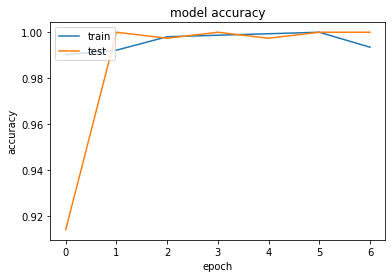

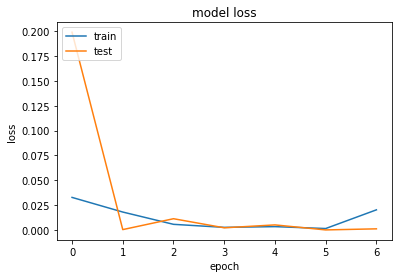

Epochs 7
12/12 [==============================] - 0s 28ms/step - loss: 4.3345e-04 - accuracy: 1.0000
Test loss 0.00043344986625015736
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 114
    No Choques: 46
Validación no choques parcial
    Muestras: 160
    Choques: 11
    No Choques: 149
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 37
    No Choques: 123
Validación de solo cuadrado
    Muestras: 160
    Choques: 138
    No Choques: 22
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 0
    No Choques: 160
Validación de dos cuadrado
    Muestras: 160
    Choques: 59
    No Choques: 101

  
        ===== Inicio modelo model2_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 5s 96ms/step - loss: 0.

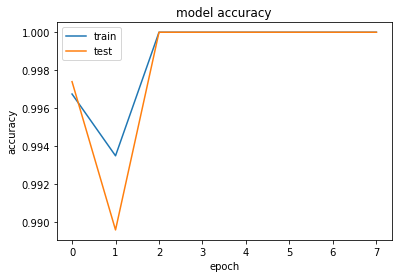

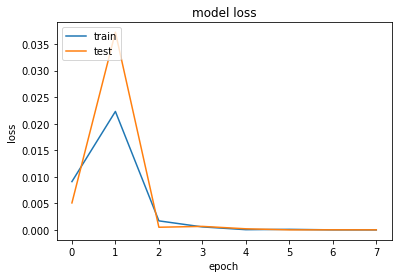

Epochs 8
12/12 [==============================] - 0s 26ms/step - loss: 5.1067e-04 - accuracy: 1.0000
Test loss 0.0005106723983772099
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 1
    No Choques: 959
Validación choques parciales
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación no choques parcial
    Muestras: 160
    Choques: 134
    No Choques: 26
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de solo cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 38
    No Choques: 122
Validación de dos cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0

  
        ===== Inicio modelo model3_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 4s 71ms/step - loss: 9.6783

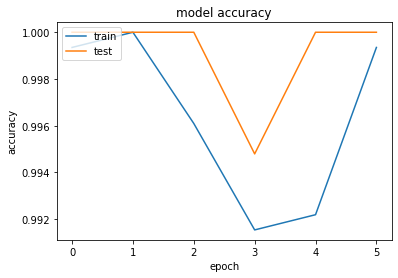

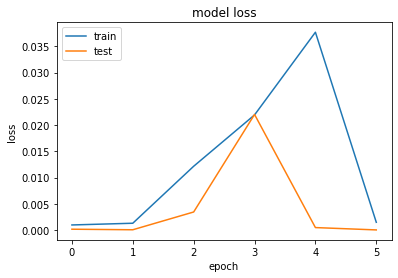

Epochs 6
12/12 [==============================] - 0s 20ms/step - loss: 1.5831e-04 - accuracy: 1.0000
Test loss 0.00015831166820134968
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación no choques parcial
    Muestras: 160
    Choques: 144
    No Choques: 16
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de solo cuadrado
    Muestras: 160
    Choques: 158
    No Choques: 2
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 76
    No Choques: 84
Validación de dos cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0

  
        ===== Inicio modelo model4_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 6s 108ms/step - loss: 0.074

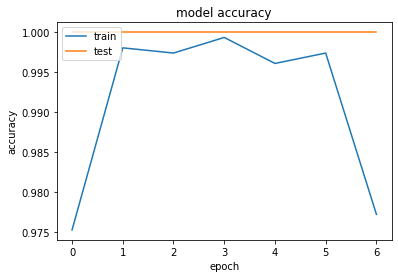

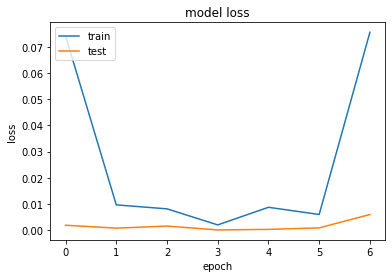

Epochs 7
12/12 [==============================] - 0s 28ms/step - loss: 8.1113e-04 - accuracy: 1.0000
Test loss 0.0008111345232464373
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 101
    No Choques: 59
Validación no choques parcial
    Muestras: 160
    Choques: 2
    No Choques: 158
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 23
    No Choques: 137
Validación de solo cuadrado
    Muestras: 160
    Choques: 98
    No Choques: 62
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 0
    No Choques: 160
Validación de dos cuadrado
    Muestras: 160
    Choques: 26
    No Choques: 134

  
        ===== Inicio modelo model5_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 5s 100ms/step - loss: 0.01

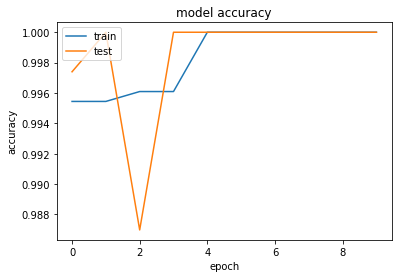

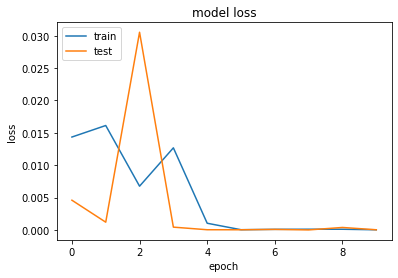

Epochs 10
12/12 [==============================] - 0s 28ms/step - loss: 3.8610e-05 - accuracy: 1.0000
Test loss 3.8609588955296203e-05
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación no choques parcial
    Muestras: 160
    Choques: 141
    No Choques: 19
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de solo cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 67
    No Choques: 93
Validación de dos cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0

  
        ===== Inicio modelo model6_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 4s 75ms/step - loss: 0.001

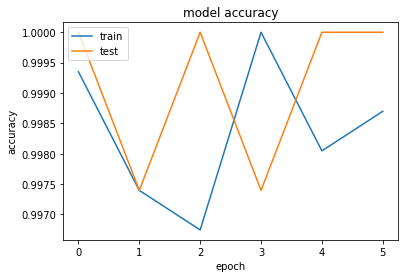

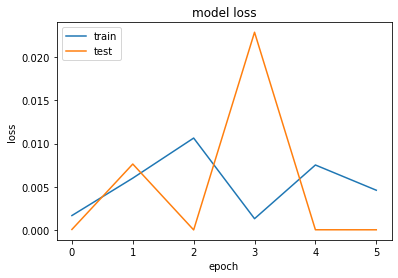

Epochs 6
12/12 [==============================] - 0s 20ms/step - loss: 5.6167e-05 - accuracy: 1.0000
Test loss 5.616701673716307e-05
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación no choques parcial
    Muestras: 160
    Choques: 144
    No Choques: 16
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación de solo cuadrado
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 96
    No Choques: 64
Validación de dos cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0

  
        ===== Inicio modelo model7_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 6s 109ms/step - loss: 0.0150

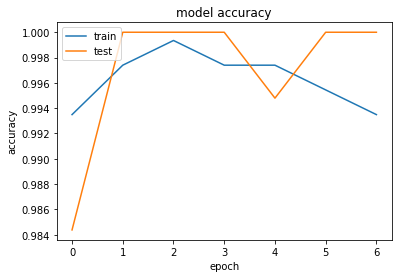

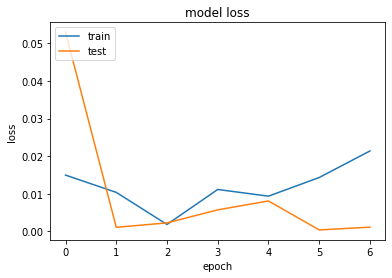

Epochs 7
12/12 [==============================] - 0s 30ms/step - loss: 0.0011 - accuracy: 1.0000
Test loss 0.0010798267321661115
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 2
    No Choques: 958
Validación choques parciales
    Muestras: 160
    Choques: 145
    No Choques: 15
Validación no choques parcial
    Muestras: 160
    Choques: 16
    No Choques: 144
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 58
    No Choques: 102
Validación de solo cuadrado
    Muestras: 160
    Choques: 126
    No Choques: 34
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 0
    No Choques: 160
Validación de dos cuadrado
    Muestras: 160
    Choques: 92
    No Choques: 68

  
        ===== Inicio modelo model8_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 5s 100ms/step - loss: 0.0109 

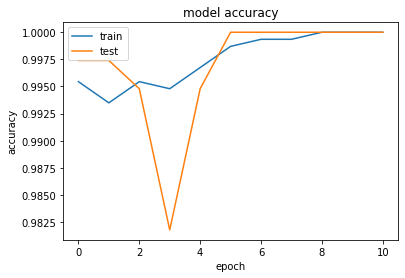

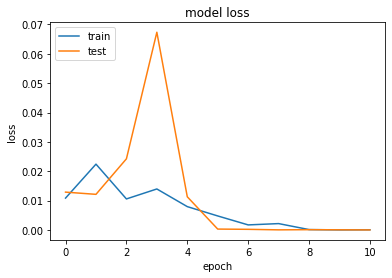

Epochs 11
12/12 [==============================] - 0s 30ms/step - loss: 3.2508e-04 - accuracy: 1.0000
Test loss 0.0003250839654356241
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 952
    No Choques: 8
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación no choques parcial
    Muestras: 160
    Choques: 109
    No Choques: 51
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 158
    No Choques: 2
Validación de solo cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 11
    No Choques: 149
Validación de dos cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0

  
        ===== Inicio modelo model9_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 4s 66ms/step - loss: 9.803

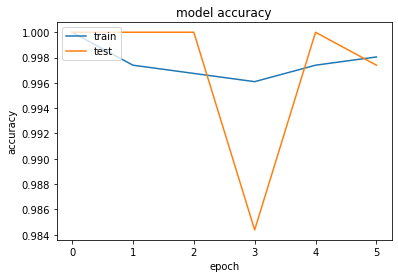

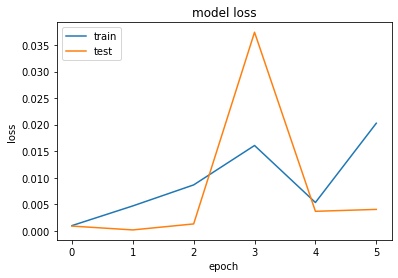

Epochs 6
12/12 [==============================] - 0s 19ms/step - loss: 8.9403e-04 - accuracy: 1.0000
Test loss 0.0008940261323004961
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación no choques parcial
    Muestras: 160
    Choques: 137
    No Choques: 23
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de solo cuadrado
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 81
    No Choques: 79
Validación de dos cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0

  
        ===== Inicio modelo model10_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 6s 110ms/step - loss: 0.033

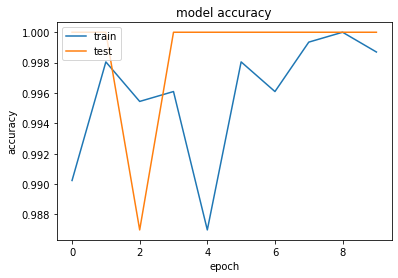

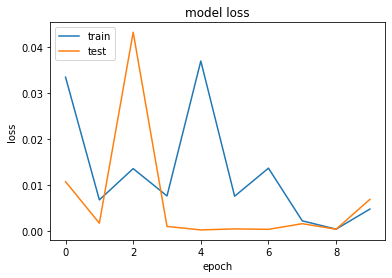

Epochs 10
12/12 [==============================] - 0s 30ms/step - loss: 1.9798e-04 - accuracy: 1.0000
Test loss 0.00019797543063759804
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 137
    No Choques: 23
Validación no choques parcial
    Muestras: 160
    Choques: 15
    No Choques: 145
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 67
    No Choques: 93
Validación de solo cuadrado
    Muestras: 160
    Choques: 134
    No Choques: 26
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 0
    No Choques: 160
Validación de dos cuadrado
    Muestras: 160
    Choques: 104
    No Choques: 56

  
        ===== Inicio modelo model11_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 5s 97ms/step - loss: 0

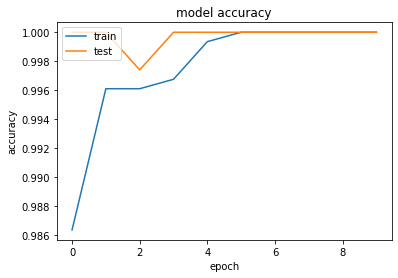

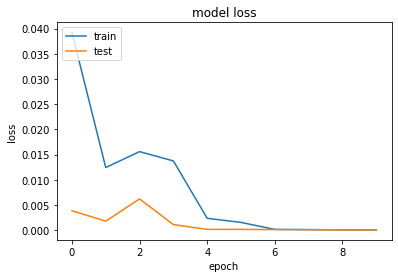

Epochs 10
12/12 [==============================] - 0s 27ms/step - loss: 1.6426e-04 - accuracy: 1.0000
Test loss 0.0001642632414586842
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 959
    No Choques: 1
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación no choques parcial
    Muestras: 160
    Choques: 130
    No Choques: 30
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 157
    No Choques: 3
Validación de solo cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 33
    No Choques: 127
Validación de dos cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0

  
        ===== Inicio modelo model12_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 3s 60ms/step - loss: 0.01

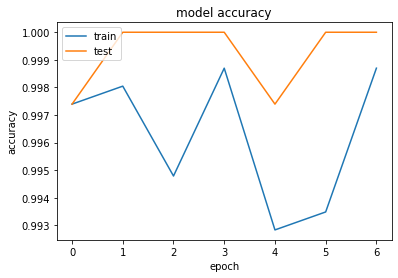

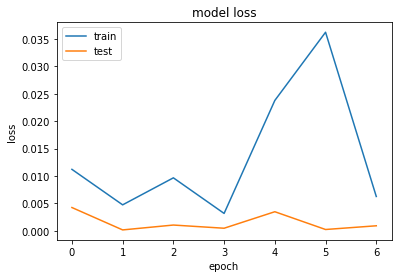

Epochs 7
12/12 [==============================] - 0s 18ms/step - loss: 1.5784e-04 - accuracy: 1.0000
Test loss 0.00015784033166710287
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 953
    No Choques: 7
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 156
    No Choques: 4
Validación no choques parcial
    Muestras: 160
    Choques: 122
    No Choques: 38
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 158
    No Choques: 2
Validación de solo cuadrado
    Muestras: 160
    Choques: 156
    No Choques: 4
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 63
    No Choques: 97
Validación de dos cuadrado
    Muestras: 160
    Choques: 157
    No Choques: 3

  
        ===== Inicio modelo model13_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 6s 106ms/step - loss: 0.02

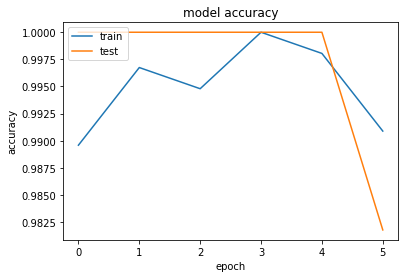

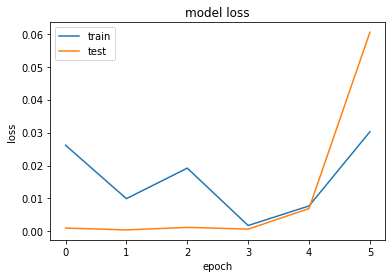

Epochs 6
12/12 [==============================] - 0s 30ms/step - loss: 0.0010 - accuracy: 1.0000
Test loss 0.0010093965101987123
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 959
    No Choques: 1
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 124
    No Choques: 36
Validación no choques parcial
    Muestras: 160
    Choques: 12
    No Choques: 148
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 63
    No Choques: 97
Validación de solo cuadrado
    Muestras: 160
    Choques: 129
    No Choques: 31
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 0
    No Choques: 160
Validación de dos cuadrado
    Muestras: 160
    Choques: 78
    No Choques: 82

  
        ===== Inicio modelo model14_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 5s 98ms/step - loss: 0.0433 -

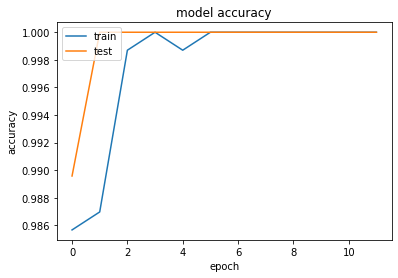

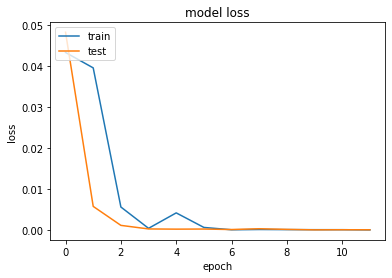

Epochs 12
12/12 [==============================] - 0s 28ms/step - loss: 1.1196e-04 - accuracy: 1.0000
Test loss 0.00011196485866094008
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 960
    No Choques: 0
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación no choques parcial
    Muestras: 160
    Choques: 149
    No Choques: 11
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de solo cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 71
    No Choques: 89
Validación de dos cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0

  
        ===== Inicio modelo model15_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 4s 66ms/step - loss: 0.00

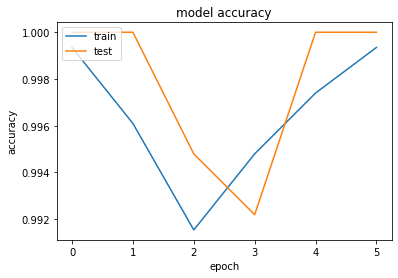

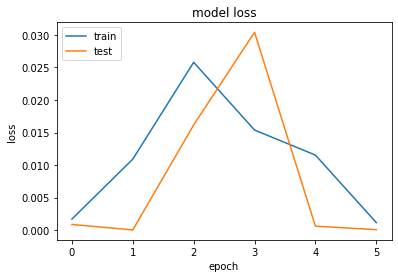

Epochs 6
12/12 [==============================] - 0s 20ms/step - loss: 8.6589e-04 - accuracy: 1.0000
Test loss 0.0008658944279886782
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 958
    No Choques: 2
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación no choques parcial
    Muestras: 160
    Choques: 128
    No Choques: 32
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 156
    No Choques: 4
Validación de solo cuadrado
    Muestras: 160
    Choques: 159
    No Choques: 1
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 64
    No Choques: 96
Validación de dos cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0

  
        ===== Inicio modelo model16_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 6s 108ms/step - loss: 0.048

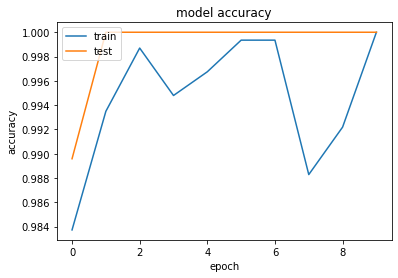

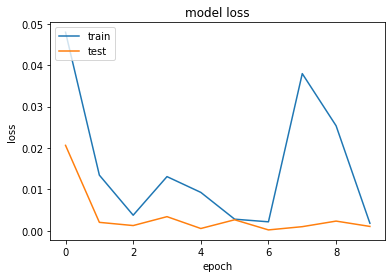

Epochs 10
12/12 [==============================] - 0s 32ms/step - loss: 5.4846e-04 - accuracy: 1.0000
Test loss 0.000548459414858371
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 959
    No Choques: 1
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 122
    No Choques: 38
Validación no choques parcial
    Muestras: 160
    Choques: 3
    No Choques: 157
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 51
    No Choques: 109
Validación de solo cuadrado
    Muestras: 160
    Choques: 134
    No Choques: 26
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 0
    No Choques: 160
Validación de dos cuadrado
    Muestras: 160
    Choques: 76
    No Choques: 84

  
        ===== Inicio modelo model17_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 5s 98ms/step - loss: 0.02

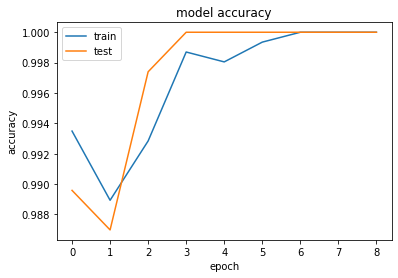

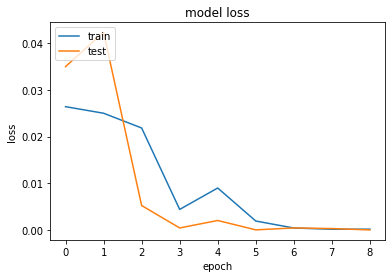

Epochs 9
12/12 [==============================] - 0s 26ms/step - loss: 4.5246e-04 - accuracy: 1.0000
Test loss 0.00045245932415127754
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 956
    No Choques: 4
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 157
    No Choques: 3
Validación no choques parcial
    Muestras: 160
    Choques: 129
    No Choques: 31
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 156
    No Choques: 4
Validación de solo cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 53
    No Choques: 107
Validación de dos cuadrado
    Muestras: 160
    Choques: 160
    No Choques: 0

  
        ===== Inicio modelo model18_simple =====

        == Entrenamiento completo ==
Epoch 1/100
48/48 [==============================] - 4s 62ms/step - loss: 0.00

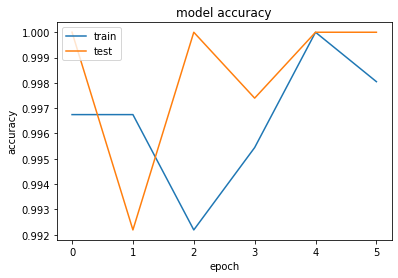

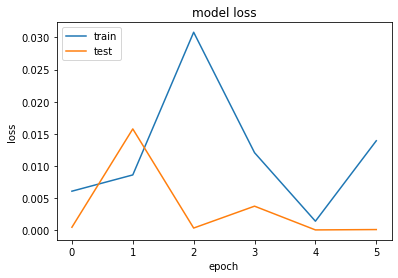

Epochs 6
12/12 [==============================] - 0s 18ms/step - loss: 4.8599e-04 - accuracy: 1.0000
Test loss 0.00048599380534142256
Test accuracy 1.0
Validación choques completos
    Muestras: 960
    Choques: 957
    No Choques: 3
Validación no choques completos
    Muestras: 960
    Choques: 0
    No Choques: 960
Validación choques parciales
    Muestras: 160
    Choques: 158
    No Choques: 2
Validación no choques parcial
    Muestras: 160
    Choques: 132
    No Choques: 28
Validación de solo cuadrado con inicio
    Muestras: 160
    Choques: 157
    No Choques: 3
Validación de solo cuadrado
    Muestras: 160
    Choques: 157
    No Choques: 3
Validación de dos cuadrados con inicio
    Muestras: 160
    Choques: 66
    No Choques: 94
Validación de dos cuadrado
    Muestras: 160
    Choques: 159
    No Choques: 1


In [ ]:
modelos_name_simple = ["model1_simple", "model2_simple", "model3_simple", "model4_simple", "model5_simple", "model6_simple", 
                      "model7_simple", "model8_simple", "model9_simple", "model10_simple", "model11_simple", "model12_simple", 
                      "model13_simple", "model14_simple", "model15_simple", "model16_simple", "model17_simple", "model18_simple"]


resultados = []

for modelo in modelos_name_simple:
  
  print('''
  
        ===================================
        ===== Inicio modelo''', modelo, '''=====
        ===================================''')
  
  print('''
        ============================
        == Entrenamiento completo ==
        ============================''')
  
  test_model_simple(modelo,modelos[modelos_name_simple.index(modelo)], train_simples, val_simples)

In [ ]:
columnas = ['Modelo','Epochs','Loss','Accuracy',
            'Choque completo - Muestra','Choque completo - true','Choque completo - false', 
            'NoChoque completo - Muestra','NoChoque completo - true','NoChoque completo - false',
            'Choque parcial - Muestra','Choque parcial - true','Choque parcial - false', 
            'NoChoque parcial - Muestra','NoChoque parcial - true','NoChoque parcial - false',
            'Choque cuadrado - Muestra','Choque cuadrado - true','Choque cuadrado - false', 
            'NoChoque cuadrado - Muestra','NoChoque cuadrado - true','NoChoque cuadrado - false',
            'Choque cuadrado parcial - Muestra','Choque cuadrado parcial - true','Choque cuadrado parcial - false', 
            'NoChoque cuadrado parcial - Muestra','NoChoque cuadrado parcial - true','NoChoque cuadrado parcial - false']




df = pd.DataFrame(resultados, columns=columnas)

df.to_excel('resultados_TFG_simple.xlsx',
             sheet_name='resultados',
             index = False)  

!cp resultados_TFG_simple.xlsx '/content/drive/MyDrive/Óscar_Redes/'
